In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [6]:
import seaborn as sns

In [7]:
from sklearn.model_selection import train_test_split

In [11]:
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
from matplotlib.colors import ListedColormap

In [17]:
from sklearn.metrics import accuracy_score

In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,classification_report,log_loss

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
df = pd.read_csv("C:\\Users\\Asus\\Desktop\\internship titanic folder\\Titanic-Dataset.csv")


In [23]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [24]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


data loading

In [26]:
df1 = df.drop(columns=['Name','Ticket'])
df1.shape

(891, 10)

In [31]:
df2=df1.drop(columns='Cabin')
df2.dropna(subset=['Embarked'],axis=0,inplace=True)
df2.shape

(889, 9)

In [32]:
df3 = df2.fillna(df2.Age.mean())
df3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

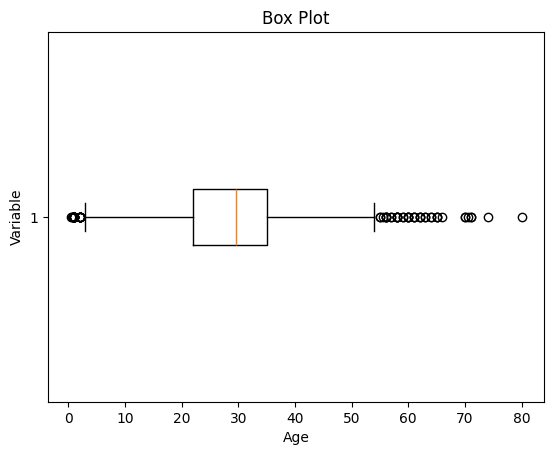

In [33]:
plt.boxplot(df3['Age'],vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()

In [92]:
# Calculate the mean and standard deviation for the 'Age' column
mean = df3['Age'].mean()
std = df3['Age'].std()

# Calculate the lower and upper bounds for the filtering
lower_bound = mean - std * 2
upper_bound = mean + std * 2

print('Lower Bound:', lower_bound)
print('Upper Bound:', upper_bound)

# Filter the rows in df3 based on the condition
df4 = df3[(df3['Age'] >= lower_bound) & (df3['Age'] <= upper_bound)]


Lower Bound: 3.7054001079256587
Upper Bound: 55.57878528533277


In [40]:
X = df3[['Pclass','Age','SibSp','Parch','Fare','Embarked']]
Y = df3['Survived']

In [55]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Get list of numeric columns
num_col_ = [col for col in X.columns if X[col].dtype != 'object']

# Create a copy of X to avoid changing the original data
x1 = X.copy()

# Apply MinMaxScaler to the numeric columns
x1[num_col_] = scaler.fit_transform(x1[num_col_])

# Display the first few rows
x1.head()


,Pclass,Age,SibSp,Parch,Fare,Embarked
0,1.0,0.271174,0.125,0.0,0.014151,S
1,0.0,0.472229,0.125,0.0,0.139136,C
2,1.0,0.321438,0.000,0.0,0.015469,S
3,0.0,0.434531,0.125,0.0,0.103644,S
4,1.0,0.434531,0.000,0.0,0.015713,S


In [66]:

# Replace 'Embarked' values
x1['Embarked'] = x1['Embarked'].replace({'C': 0, 'Q': 1, 'S': 2})

# Handle missing values in 'Embarked' after replacement (if any)
x1['Embarked'] = x1['Embarked'].fillna(0)  # You can replace this with any default value if necessary

# Display the first few rows
x1.head()


,Pclass,Age,SibSp,Parch,Fare,Embarked
0,1.0,0.271174,0.125,0.0,0.014151,2
1,0.0,0.472229,0.125,0.0,0.139136,0
2,1.0,0.321438,0.000,0.0,0.015469,2
3,0.0,0.434531,0.125,0.0,0.103644,2
4,1.0,0.434531,0.000,0.0,0.015713,2


In [67]:
x = x1.iloc[:,[2,3]].values
y = x1.iloc[:,4].values

In [68]:
print(x1.iloc[:,[2,3,4]].isnull().sum())

SibSp    0
Parch    0
Fare     0
dtype: int64


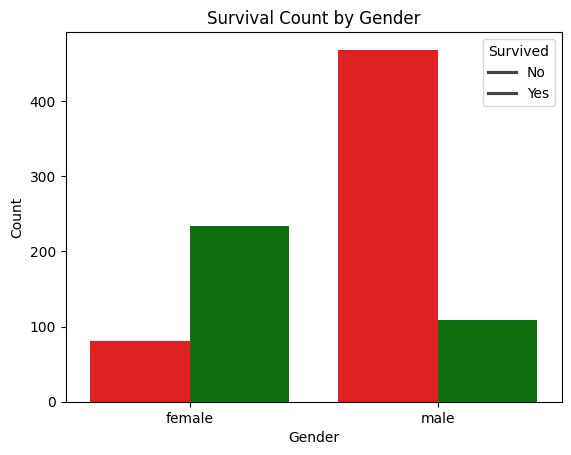

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'Sex' and 'Survived' to get counts
survival_count = df.groupby(['Sex', 'Survived']).size().reset_index(name='Count')

# Plot the data using seaborn
sns.barplot(data=survival_count, x='Sex', y='Count', hue='Survived', palette={0: "red", 1: "green"})

# Add title and labels
plt.title("Survival Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")

# Customize the legend
plt.legend(title="Survived", labels=["No", "Yes"])

# Display the plot
plt.show()


In [73]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Example: Using a simple dataset (e.g., Titanic dataset or custom dataset)

# Load your data (replace this with your dataset)
# For demonstration, we'll use a built-in dataset from sklearn
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# For simplicity, we assume the target variable is 'species' and we take the first two classes for binary classification
df['target'] = data.target
df = df[df['target'] != 2]  # Filter for binary classification (only classes 0 and 1)

# Features and target variable
X = df.drop(columns='target')
y = df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0000
Confusion Matrix:
[[17  0]
 [ 0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



C:\Users\Asus\AppData\Local\Temp\ipykernel_14696\4116300760.py:50: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1],


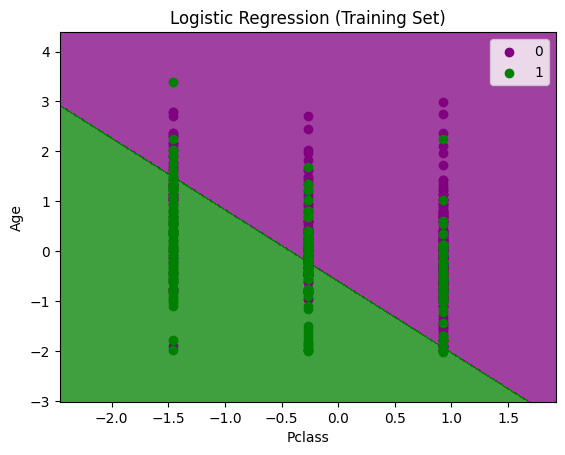

Test Set Accuracy: 0.6783


In [88]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Load the Titanic dataset from seaborn
df = sns.load_dataset('titanic')

# Preprocess the data
df = df.dropna(subset=['survived', 'pclass', 'age'])  # Drop rows with missing values
df['sex'] = df['sex'].map({'male': 1, 'female': 0})  # Convert 'sex' to numeric

# Selecting 'Pclass' and 'Age' as features for the example (you can add more features as needed)
X = df[['pclass', 'age']].values  # Features: Pclass and Age
y = df['survived'].values  # Target: Survived (1 or 0)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for models like Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Plot the decision boundary
x1, x2 = np.meshgrid(np.arange(start=X_train[:, 0].min() - 1, stop=X_train[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_train[:, 1].min() - 1, stop=X_train[:, 1].max() + 1, step=0.01))

# Predict class labels for each point in the meshgrid
Z = classifier.predict(np.array([x1.ravel(), x2.ravel()]).T)
Z = Z.reshape(x1.shape)

# Plot the decision boundary using contour
plt.contourf(x1, x2, Z, alpha=0.75, cmap=ListedColormap(('purple', 'green')))

# Set axis limits
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

# Scatter plot of the training set
for i, j in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1], 
                c=ListedColormap(('purple', 'green'))(i), label=j)

# Add labels, title, and legend
plt.title('Logistic Regression (Training Set)')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.legend()

# Show the plot
plt.show()

# Evaluate the model's performance (optional)
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Accuracy


In [91]:
from sklearn.metrics import accuracy_score

# Assuming y_test_binary and y_pred are already defined
# For demonstration purposes, let's create sample values for y_test_binary and y_pred

y_test_binary = [0, 1, 1, 0, 1, 0, 1, 1, 0, 1]  # Example true labels (binary)
y_pred = [0, 1, 1, 0, 0, 0, 1, 1, 0, 1]  # Example predicted labels (binary)

# Calculate accuracy
accuracy = accuracy_score(y_test_binary, y_pred)

# Print the accuracy as a percentage with 2 decimal places
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 90.00%


Random Forest Classifier